<a href="https://colab.research.google.com/github/mg-789/COGNITIVE-STATE-ESTIMATION-FOR-ONLINE-MEETINGS-USING-MACHINE-LEARNING/blob/main/_ml_project_colab_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 4.2 Data preparation step
import pandas as panda
import numpy as numpy
import seaborn as sns
from matplotlib import pyplot
data_fram = panda.read_csv("/content/drive/My Drive/Colab Notebooks/fer2013.csv")

sns.countplot(data_fram.emotion)
pyplot.show()
#print(data_fram) #number with disgust emotion [35887 rows x 3 columns]
data_frame=data_fram.loc[data_fram['emotion'] != 1]
#data_frame11=data_frame.loc[data_fram['emotion'] != 0]
#data_frame1=data_frame11.loc[data_fram['emotion'] != 2]
#data_frame2=data_frame1.loc[data_fram['emotion'] != 5]
#data_frame3=data_frame2.loc[data_fram['emotion'] != 6]
print(data_frame) #number without disgust emotion [35340 rows x 3 columns], we use it in model




In [ ]:

import pandas as panda
import numpy as numpy
import seaborn as sns
from matplotlib import pyplot
data_frame = panda.read_csv("/content/drive/My Drive/Colab Notebooks/fer2013.csv")
INTERESTED_LABELS = [0, 4]
data_frame = data_frame[data_frame.emotion.isin(INTERESTED_LABELS)]
data_frame.shape

(11030, 3)

In [ ]:
# Draw a bar chart representing the count of each emotion
# Draw the accurecy and loss graph
import seaborn as sns
from matplotlib import pyplot

sns.set()

sns.countplot(data_frame.emotion)
pyplot.show()

In [ ]:
def convert_images_to_gray_scale():
    gray_images = data_frame.pixels.apply(convert_from_pixel_array_to_image_array)
    gray_images = numpy.stack(gray_images, axis=0)
    return gray_images

def convert_from_pixel_array_to_image_array(pixel_array):
    pixel_array = numpy.array(pixel_array.split(" "))
    pixel_array = pixel_array.reshape(48, 48, 1)
    pixel_array = pixel_array.astype("float32")
    return pixel_array

def split_data():
    X_train, X_valid, y_train, y_valid = train_test_split(
        gray_image, image_label,
        test_size=0.2, shuffle=True,
        random_state=42, stratify=image_label
    )
    return X_train, X_valid, y_train, y_valid

In [ ]:
gray_image = convert_images_to_gray_scale()

In [ ]:
# Making images compatible to the model
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
number = LabelEncoder()
# Convert the array to class vector, then converts this class vector to binary class matrix
image_label = np_utils.to_categorical(number.fit_transform(data_frame.emotion))

# Splitting Data
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = split_data()
# Normalize the image arrays using min-max normalization. For gray-scaled images min=0 and max=255
X_train = X_train / 255.
X_valid = X_valid / 255.

In [ ]:
#Train and Test Model 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dropout, BatchNormalization, Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from keras.utils import np_utils



def get_conv2D(filters, kernel_size):
    return Conv2D(
          filters=filters,
          kernel_size=kernel_size,
          input_shape=(48, 48, 1),
          activation='relu',
          padding='same',
          kernel_initializer='he_normal'
    )

model = Sequential()

model.add(get_conv2D(64, (5, 5)))
model.add(BatchNormalization())
model.add(get_conv2D(64, (5, 5)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))  

model.add(get_conv2D(128, (3, 3)))
model.add(BatchNormalization())
model.add(get_conv2D(128, (3, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(get_conv2D(256, (3, 3)))
model.add(BatchNormalization())
model.add(get_conv2D(256, (3, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())    
model.add(Dense(128, activation='relu', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dropout(0.6))
model.add(Dense(2, activation='softmax'))

model.compile(loss=
              'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

train = ImageDataGenerator(rotation_range=15, width_shift_range=0.15, height_shift_range=0.15,shear_range=0.15,zoom_range=0.15,horizontal_flip=True)

train.fit(X_train)

result = model.fit_generator(train.flow(X_train, y_train, batch_size=32),validation_data=(X_valid, y_valid),
                             steps_per_epoch=len(X_train) / 32,epochs=100,use_multiprocessing=True)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dropout, BatchNormalization, Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils

def get_conv2D(filters, kernel_size):
    return Conv2D(
          filters=filters,
          kernel_size=kernel_size,
          input_shape=(48, 48, 1),
          activation='elu',
          padding='same',
          kernel_initializer='he_normal'
    )

model = Sequential()

model.add(get_conv2D(64, (5, 5)))
model.add(BatchNormalization())
model.add(get_conv2D(64, (5, 5)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(get_conv2D(128, (3, 3)))
model.add(BatchNormalization())
model.add(get_conv2D(128, (3, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(get_conv2D(256, (3, 3)))
model.add(BatchNormalization())
model.add(get_conv2D(256, (3, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())    
model.add(Dense(128, activation='elu', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dropout(0.6))
model.add(Dense(6, activation='softmax')) ###

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

train_datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.15,
    height_shift_range=0.15,
    shear_range=0.15,
    zoom_range=0.15,
    horizontal_flip=True,
)

train_datagen.fit(X_train)

history = model.fit_generator(
    train_datagen.flow(X_train, y_train, batch_size=32),
    validation_data=(X_valid, y_valid),
    steps_per_epoch=len(X_train) / 32,
    epochs=100,
    use_multiprocessing=True
)



In [ ]:

from tensorflow.keras import optimizers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dropout, BatchNormalization, Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from keras.utils import np_utils

def get_conv2D(filters, kernel_size):
    return Conv2D(
          filters=filters,
          kernel_size=kernel_size,
          input_shape=(48, 48, 1),
          activation='relu',
          padding='same',
          kernel_initializer='he_normal'
    )
def model_3(optim):
  model = Sequential()
  model.add(get_conv2D(64, (5, 5)))
  model.add(BatchNormalization())
  model.add(get_conv2D(64, (5, 5)))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.4))
  
  model.add(get_conv2D(128, (3, 3)))
  model.add(BatchNormalization())
  model.add(get_conv2D(128, (3, 3)))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.4))
  
  model.add(get_conv2D(256, (3, 3)))
  model.add(BatchNormalization())
  model.add(get_conv2D(256, (3, 3)))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.5))

  
  model.add(Flatten())    
  model.add(Dense(128, activation='relu', kernel_initializer='he_normal'))
  model.add(BatchNormalization())
  model.add(Dropout(0.6))
  model.add(Dense(6, activation='softmax')) ###
  model.compile(loss='categorical_crossentropy', optimizer=optim, metrics=['accuracy'])

  return model
optims = [optimizers.Adam(0.0001)]
model = model_3(optims[0]) 

train_datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.15,
    height_shift_range=0.15,
    shear_range=0.15,
    zoom_range=0.15,
    horizontal_flip=True,
)

history = model.fit_generator(
    train_datagen.flow(X_train, y_train, batch_size=32),
    validation_data=(X_valid, y_valid),
    steps_per_epoch=len(X_train) / 32,
    epochs=100,
    use_multiprocessing=True
)
for 

In [ ]:
# Draw the accurecy and loss graph
import seaborn as sns
from matplotlib import pyplot

sns.set()
fig = pyplot.figure(0, (12, 4))

ax = pyplot.subplot(1, 2, 1)
sns.lineplot(history.epoch, history.history['accuracy'], label='train')
sns.lineplot(history.epoch, history.history['val_accuracy'], label='valid')
pyplot.title('Accuracy')
pyplot.tight_layout()

ax = pyplot.subplot(1, 2, 2)
sns.lineplot(history.epoch, history.history['loss'], label='train')
sns.lineplot(history.epoch, history.history['val_loss'], label='valid')
pyplot.title('Loss')
pyplot.tight_layout()

pyplot.savefig('epoch_history_dcnn.png')
pyplot.show()

In [ ]:
# Draw a bar chart representing the count of each emotion
# Draw the accurecy and loss graph
import seaborn as sns
from matplotlib import pyplot

sns.set()
fig = pyplot.figure(0, (12, 4))

sns.countplot(data_frame.emotion)
pyplot.show()

In [ ]:
#no need it for the report
pip install scikit-plot

In [ ]:
# Draw the confusion matrix

from scikitplot.metrics import plot_confusion_matrix
plot_confusion_matrix(numpy.argmax(y_valid, axis=1), model.predict_classes(X_valid), figsize=(6,6))

In [ ]:
'''
for i in range(len(X_valid)): 
    test_data = np.array(X_valid[i]).reshape(-1, row, cox, 1)
    model_output = model.predict(test_data)
    output_class = category_output(model_output)
    print('Image: ',i,'model_output: ', output_class)

history.save('ImageEmptionClassifierModel')
'''


In [ ]:
#model.save('ImageEmptionClassifierModel')

save_json = model.to_json()
with open("emotion.json", "w") as json_file:
    json_file.write(save_json)
model.save_weights("emotion.h5")

In [ ]:
## Part 1 -This was from Merian for the video - Saturday
#model.save('ImageEmptionClassifierModel')
from keras.models import model_from_json
model = model_from_json(open("/content/emotion.json", "r").read())
model.load_weights('/content/emotion.h5') #load weights



In [ ]:
#no need this for the report
import cv2
from google.colab.patches import cv2_imshow
face_cascade = cv2.CascadeClassifier('/content/drive/My Drive/Colab Notebooks/haarcascade_frontalface_default.xml')
img = cv2.imread('/content/drive/My Drive/Colab Notebooks/Monaliza.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #transform image to gray scale
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
for (x,y,w,h) in faces:
  cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
cv2_imshow(img)

detected_face = img[int(y):int(y+h), int(x):int(x+w)] #crop detected face
detected_face = cv2.cvtColor(detected_face, cv2.COLOR_BGR2GRAY) #transform to gray scale
detected_face = cv2.resize(detected_face, (48, 48)) #resize to 48x48

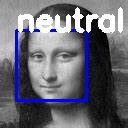

In [ ]:
#no need this for the report
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
import numpy as np
img_pixels = image.img_to_array(detected_face)
img_pixels = np.expand_dims(img_pixels, axis = 0)
 
img_pixels /= 255
 
predictions = model.predict(img_pixels)
 
#find max indexed array
max_index = np.argmax(predictions[0])
 
emotions = ('angry', 'fear', 'happy', 'sad', 'surprise', 'neutral')
emotion = emotions[max_index]

cv2.putText(img, emotion, (int(x), int(y)), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 3)
cv2_imshow(img)

In [ ]:
#no need this for the report
import cv2
import numpy as np
from keras.models import model_from_json
from keras.preprocessing import image

#load model
model = model_from_json(open("emotion.json", "r").read())
#load weights
model.load_weights('emotion.h5')


#face_haar_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
face_haar_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + '/content/drive/My Drive/Colab Notebooks/haarcascade_frontalface_default.xml')

cap=cv2.VideoCapture(0)

while True:
    ret,test_img=cap.read()# captures frame and returns boolean value and captured image
    if not ret:
        continue
    gray_img= cv2.cvtColor(test_img, cv2.COLOR_BGR2GRAY)

    faces_detected = face_haar_cascade.detectMultiScale(gray_img, 1.32, 5)


    for (x,y,w,h) in faces_detected:
        cv2.rectangle(test_img,(x,y),(x+w,y+h),(255,0,0),thickness=2)
        roi_gray=gray_img[y:y+w,x:x+h]#cropping region of interest i.e. face area from  image
        roi_gray=cv2.resize(roi_gray,(48,48))
        img_pixels = image.img_to_array(roi_gray)
        img_pixels = np.expand_dims(img_pixels, axis = 0)
        img_pixels /= 255

        predictions = model.predict(img_pixels)

        #find max indexed array
        max_index = np.argmax(predictions[0])

        emotions = ('angry', 'fear', 'happy', 'sad', 'surprise', 'neutral')
        #emotions = ('happy', 'neutral')

        predicted_emotion = emotions[max_index]

        cv2.putText(test_img, predicted_emotion, (int(x), int(y)), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 7)

    resized_img = cv2.resize(test_img, (1000, 700))
    cv2.imshow('Facial emotion analysis ',resized_img)



    if cv2.waitKey(10) == ord('q'):#wait until 'q' key is pressed
        break

cap.release()
cv2.destroyAllWindows

In [ ]:
#no need this for the report
face_cascade = cv2.CascadeClassifier('/content/drive/My Drive/Colab Notebooks/haarcascade_frontalface_default.xml')

In [ ]:
#no need this for the report
from google.colab import files
file=files.upload()

In [ ]:
#no need this for the report
## Part 1 -This was from Merian for the video - Saturday
#model.save('ImageEmptionClassifierModel')

from keras.models import model_from_json
model = model_from_json(open("/content/drive/MyDrive/Colab Notebooks/model.json", "r").read())
model.load_weights('/content/drive/MyDrive/Colab Notebooks/model_weight.h5') #load weights

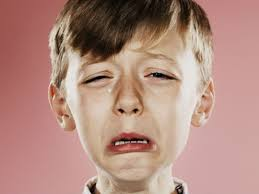

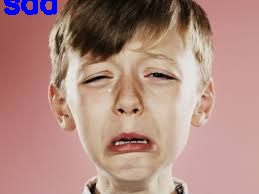

In [ ]:

#resource code
#https://sefiks.com/2018/01/10/real-time-facial-expression-recognition-on-streaming-data/

import cv2
from google.colab.patches import cv2_imshow
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
import numpy as np

#img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/mm1.jpg')
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/mm_sad222.jpg')
#img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/mm_sad333.jpg')
#img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/mm_sad4444.jpg')
#img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/mm_angry.jpeg')
#img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/mm_happy.jpg')
#img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/mm_N.jpg')

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
for (x,y,w,h) in faces:
  cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
cv2_imshow(img)

face = img[int(y):int(y+h), int(x):int(x+w)]
face = cv2.cvtColor(face, cv2.COLOR_BGR2GRAY) 
face = cv2.resize(face, (48, 48))



img_pixels = image.img_to_array(face)
img_pixels = np.expand_dims(img_pixels, axis = 0)
 
img_pixels /= 255
 
predictions = model.predict(img_pixels)

max_index = np.argmax(predictions[0])
 
emotions = ('angry', 'fear','happy', 'sad', 'surprise', 'neutral')
extract = emotions[max_index]

cv2.putText(img, extract, (int(x), int(y)), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,0,0), 3)
cv2_imshow(img)

In [ ]:
#no need this for the report
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
import numpy as np
img_pixels = image.img_to_array(detected_face)
img_pixels = np.expand_dims(img_pixels, axis = 0)
 
img_pixels /= 255
 
predictions = model.predict(img_pixels)
 
#find max indexed array
max_index = np.argmax(predictions[0])
 
emotions = ('angry', 'fear','happy', 'sad', 'surprise', 'neutral')
emotion = emotions[max_index]

cv2.putText(img, emotion, (int(x), int(y)), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,0,0), 3)
cv2_imshow(img)

In [ ]:
#no need this for the report
import numpy as np
import cv2

face_cascade = cv2.CascadeClassifier('C:\\content\\drive\\My Drive\\Colab Notebooks\\haarcascade_frontalface_default.xml')

img = cv2.imread('/content/sample_data/mm1.jpg')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
#faces = face_cascade.detectMultiScale(gray)

for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

cv2.imshow('img',img)

k = cv2.waitKey(0)
if k == 27:         # wait for ESC key to exit
    cv2.destroyAllWindows()
elif k == ord('s'): # wait for 's' key to save and exit
    cv2.imwrite('messigray.png',img)
    cv2.destroyAllWindows()

In [ ]:
#no need this for the report
import cv2

def _predict(path):
  facecasc = cv2.CascadeClassifier('C:\\content\\drive\\My Drive\\Colab Notebooks\\haarcascade_frontalface_default.xml')
  imagePath = '/content/'+path
  image = cv2.imread(imagePath)
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  faces = facecasc.detectMultiScale(gray,scaleFactor=1.3, minNeighbors=10)
  print("No of faces : ",len(faces))
  i = 1
  for (x, y, w, h) in faces:
    i=i+1
    cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)
    roi_gray = gray[y:y + h, x:x + w]                      #croping
    cropped_img = np.expand_dims(np.expand_dims(cv2.resize(roi_gray, (48, 48)), -1), 0)
    prediction = model.predict(cropped_img)

    maxindex = int(np.argmax(prediction))
    print("person ",i," : ",emotion_dict[maxindex], "-->",emojis[maxindex])
    cv2.putText(image, emotion_dict[maxindex], (x+10, y-20), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2)  
                                              #if text is not apeared , change coordinates. it may work
  
  cv2.imshow(image)

In [ ]:
_predict('/content/sample_data/mm_sad222.jpg')

error: ignored